# Feature Analysis

In [1]:
import helpers as h
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv("../data/creditcard.csv")
Features = ['V%d' % n for n in range(1, 29)]

NameError: name 'pd' is not defined

### Helper Functions

In [ ]:
def bootstrap_mean(df, statistic, samples=500):
    """
    Returns an pandas series of mean bootstrap values for the statistic
    for each of the columns in the dataframe.

    Parameters
    ----------
    df: Pandas dataframe
    statistic: valid arguments include 'mean', 'median', 'std'
    samples: number of bootstrap samples to generate

    Returns
    -------
    Pandas Series
    """

    df_bootstrap = pd.DataFrame(columns=df.columns)
    for _ in range(samples):
        bootstrap = df.sample(n=len(df), replace=True, axis=0)
        if statistic == 'mean':
            df_bootstrap = df_bootstrap.append(bootstrap.mean(), ignore_index=True)
        elif statistic == 'median':
            df_bootstrap = df_bootstrap.append(bootstrap.median(), ignore_index=True)
        elif statistic == 'std':
            df_bootstrap = df_bootstrap.append(bootstrap.std(), ignore_index=True)
        else:
            print("Invalid statitic. Please use 'mean', 'median' or 'sdt'")
            return None
    s = df_bootstrap.mean()
    df = pd.DataFrame(s).reset_index()
    df.columns = ['Feature', statistic]
    return df

In [ ]:
def ttest(sample1, sample2, Features):
    """
    Returns a dataframe with a single row containing the p values for each Feature when sample1
    is compared against sample2. Features are columns in the dataframe.

    Parameters
    ----------
    sample1: Pandas dataframe represting the sample transactions and their associated features.
    sample2: Pandas dataframe represting the sample transactions and their associated features.
    Features: List of column names from input dataframes that are to be evaluated.

    Returns
    -------
    Pandas DataFrame
    """

    p_lst = []
    for f in Features:
        stat, p_val = stats.ttest_ind(sample1[f], sample2[f], equal_var=False)  
        p_lst.append(p_val)
    df = pd.DataFrame(p_lst, index=Features).reset_index()
    df.columns = ['Feature','p_val']
    return df

### End of Helper Functions

In [84]:
### Plot feature ttest comparison

In [151]:
fraud_all = data[(data['Class']==1)]
legit_all = data[(data['Class']==0)]
df0 = ttest(fraud_all, legit_all, Features)

fraud_low = data[(data['Class']==1) & (data['Amount']<=1)]
legit_low = data[(data['Class']==0) & (data['Amount']<=1)]
df1 = ttest(fraud_low, legit_low, Features)

fraud_high = data[(data['Class']==1) & (data['Amount']==99.99)]# & (data['Amount']<=100)]
legit_high = data[(data['Class']==0) & (data['Amount']==99.99)]# & (data['Amount']<=100)]
df2 = ttest(fraud_high, legit_high, Features)

fraud_high = data[(data['Class']==1) & (data['Amount']>100)]
legit_high = data[(data['Class']==0) & (data['Amount']>100)]
df3 = ttest(fraud_high, legit_high, Features)

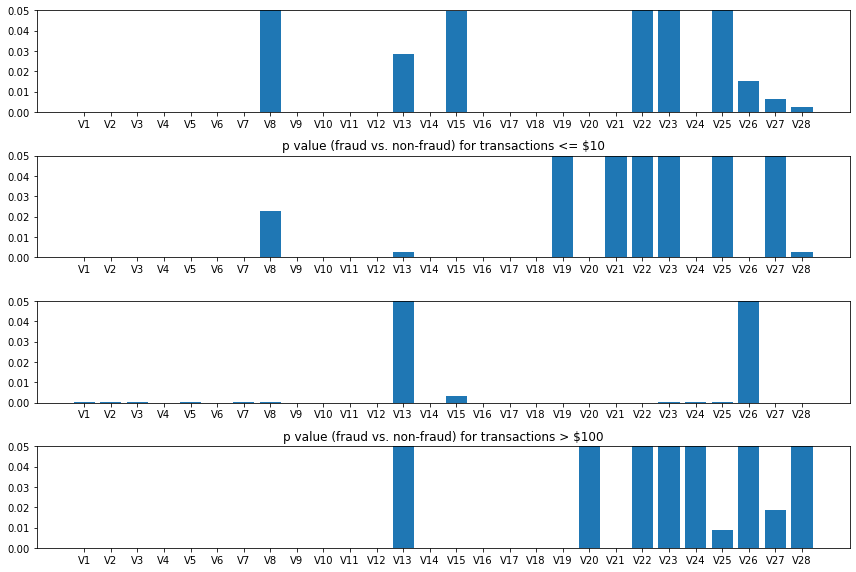

In [152]:
fig, axs = plt.subplots(4,1,figsize=(12,8),sharey=True)

x = df1['Feature']
y0 = df0['p_val']
y1 = df1['p_val']
y2 = df2['p_val']
y3 = df3['p_val']

axs[0].bar(x, y0)
axs[1].bar(x, y1)
axs[2].bar(x, y2)
axs[3].bar(x, y3)
axs[0].set_ylim(0,.05)

axs[1].set_title('p value (fraud vs. non-fraud) for transactions <= $10')
axs[3].set_title('p value (fraud vs. non-fraud) for transactions > $100')

plt.tight_layout()
# axs[1].set_ylim((0,0.01))

## Legitimate Transaction Sample

In [ ]:
# non-fraud population stats
df_stat_legit = data[Features][data['Class']==0].agg(['mean', 'median', 'std'])
df_stat_legit.head()

In [ ]:
#non bootstrap dataset just for fun to compare
df_stat_fraud = data[Features][data['Class']==1].agg(['mean', 'median', 'std'])
df_stat_fraud.head()

In [ ]:
df_stats_bsfraud['std'].sort_values()

## Bootstrap Fraud Sample

In [87]:
df_fraud = data[data['Class']==1][Features]
df_bootstrap = bootstrap_mean(df_fraud, 'std', samples=500)
# print(df_bootstrap)

In [ ]:
### Fraud Ammount V